Data Scientist at an e-commerce store
Predict User Actions on the site
Direct Monetary Impact
    predict bounce
    discover areas of the site that are weak
    Mobile/user friendliness
    Make Data Driven Decisions
    Use Science to improve user experience

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv(r'/Users/prof/Documents/machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
data

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2
...,...,...,...,...,...,...
495,1,3,0.731594,0,0,2
496,0,0,6.368775,1,3,0
497,0,0,0.172853,1,3,0
498,1,0,0.209964,0,3,0


is_mobile - is user visiting site on a mobile device
n_products_viewed - number of products user viewed during their session
visit_duration - Length of time in minutes user was on the site
is_returning_Visitor - 0 if new user, 1 if returning user
time_of_day - encoded, 0 = 12am to 6am, 1 = 6 am 12pm, 2 = 12pm to 6pm, 3 = 6pm to 12am
user_action - bounce, add_to_cart, begin_checkout, finish_checkout

# Feedforward Example one subject two inputs

Below are the inputs we need for building out a feed forward neural network example. These are all arbitrary numbers that we can use to understand how the information flows between inputs and the hidden layer of a neural net to the output.

In the example we have two inputs, one hidden layer, and one output. X represents our inputs, Y is our actual response data, W is a matrix of weights between the input and hidden layer, b is the bias terms of our hidden layer, v is a matrix of weights between the hidden layer and output node, and c is the bias term for the output node.

There are three subjects in our data, one who's responses are 0, 3.5 the second subject responses are 1,2 and the third subject responses are 1,0.5. We will focus on the first subject for our model but can extend the example below to calculate the output for the other two subjects.

The goal of this section is to understand how a Feedforward Neural Network works.

In [3]:

X = [[0,3.5],[1,2],[1,0.5]] #Data
Y = [1,1,0] #Actual Response
W = [[0.5,0.1,-0.3],[0.7, -0.3, 0.2]] #Weights
Wt = np.transpose(W)
b = [0.4, 0.1, 0]
v = [0.8, 0.1, -0.1]
c = 0.2

In [359]:
#These are our activation functions for each of our subjects. We will focus on activation_1 for our first subject
activation_1 = np.dot(Wt,X[0])
activation_2 = np.dot(Wt,X[1])
activation_3 = np.dot(Wt,X[2])

In [360]:
#We have to include the bias term to our activation function for each hidden layer node.

a1 = activation_1[0]+b[0]
a2 = activation_1[1]+b[1]
a3 = activation_1[2]+b[2]

In [6]:
#Defining the hyperbolic tangent equation for our model.
#This funciton helps us understand the nonlinear relationship of the data in our model

def tanh(value):
    z = (math.exp(value) - math.exp(-value)) / (math.exp(value) + math.exp(-value))
    return z

In [7]:
#For this example we use the sigmoid function to find the value of the output node.

def sigm(value1, value2, value3):
    zvalues = [value1, value2, value3]
    inner = np.dot([value1,value1,value1], v) + c
    sigmoid = 1 / (1+math.exp(-inner))
    return sigmoid

In [8]:
z1 = tanh(a1)
z2 = tanh(a2)
z3 = tanh(a3)

In [9]:
sigm(z1,z2,z3)

0.7300082255276845

# Feedforward Multi Samples

The previous example only used one input but how can we include all of the input/subjects to get predictions at the same time? This will require some additional code to loop over each of our subjects and generate predictions for them.

The goal of this section is to extend the example above to generate predictions for more than 1 subject.

In [17]:
#Here we build out the hidden layer knowing that we only have a range of three for our subjects and hidden layer
#This should return three lists of Z values, one list for each subject in our data

def Hidden_layer(variables, weights): 
    z_vars = []
    for i in range(3):
        z_init = []
        for j in range(3):
            globals()['activate_'+str(i)+str(j)] = np.dot(X[i],Wt[j])+b[j]
            globals()['z'+str(i)+str(j)] = ((math.exp(globals()['activate_'+str(i)+str(j)]))- math.exp(-globals()['activate_'+str(i)+str(j)]))/((math.exp(globals()['activate_'+str(i)+str(j)])) + math.exp(-globals()['activate_'+str(i)+str(j)]))
            
            z_init.append(globals()['z'+str(i)+str(j)])
        z_vars.append(z_init)
    return z_vars

In [18]:
#using the Z values can we generate predicitons for each of the subjects in our data?

def predict_y(z_val, v_val, c_val):
    y_all = []
    for i in range(3):
        y = sigm(z_val[i], v_val, c_val)
        y_all.append(y)
    return y_all

In [19]:
#Defining the sigmoid function for our data, extending it to account for multiple subjects

def sigm(inputvals, v_vals, c_val):
    inner = np.dot(inputvals, v_vals) + c_val
    sigmoid = 1 / (1+math.exp(-inner))
    return sigmoid

In [20]:
z_factors = Hidden_layer(X,W)
z_factors

[[0.9933303853851733, -0.7397830512740043, 0.6043677771171636],
 [0.9800963962661914, -0.37994896225522484, 0.0996679946249559],
 [0.8482836399575129, 0.049958374957880004, -0.19737532022490403]]

In [21]:
predict_y(z_factors, v, c)

[0.7027127220576921, 0.7183143232075594, 0.7116395517123809]

# Softmax multi output nodes

In [10]:
V2 = [[0,0.8],[0.4,0.5],[0.5, 0.4]]
V2t = np.transpose(V2)
C2 = [0.3, 0.5]

In [11]:
def softmax(input1, input2):
    softmax1 = math.exp(input1) / ((math.exp(input1))+(math.exp(input2)))
    softmax2 = 1 - softmax1
    return softmax1, softmax2

In [12]:
def softmax_multi_step1(z_vals, v_vals, c_vals):
    y_multi_final = []
    for i in range(3):
        y_multi_init = []
        for j in range(2):
            y_multi = np.dot(z_vals[i], V2t[j])+ C2[j]
            y_test = sigm(z_vals[i], v_vals[j], c_vals[j])
            y_multi_init.append(y_multi)
        y_multi_final.append(y_multi_init)
    return y_multi_final

In [24]:
softmax_init = softmax_multi_step1(z_factors, V2t, C2)

In [25]:
for i in range(3):
    one, two = softmax(softmax_init[i][0],softmax_init[i][1])
    print(one)
    print(two)

0.2972872779423079
0.7027127220576921
0.2816856767924406
0.7183143232075594
0.288360448287619
0.711639551712381


# Neural Network Feedforward Example

In the above examples, I looped over a set number of responses or records to build out a Neural network. What happens when there are more responses than are possible to manually code for? How can we leverage matricies to accomplish the same feat with a bigger dataset?

In [27]:
import matplotlib.pyplot as plt

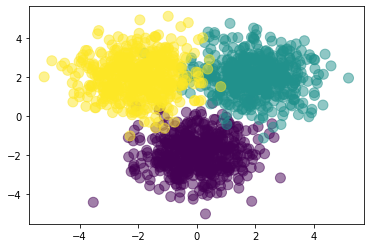

In [147]:
#Generating the random data, three inputs of the length 500, they are plotted below
N = 500
x1 = np.random.randn(N, 2) + np.array([0,-2])
x2 = np.random.randn(N, 2) + np.array([2,2])
x3 = np.random.randn(N, 2) + np.array([-2,2])

x = np.vstack([x1, x2, x3])

y = np.array([0]*N + [1]*N + [2]*N)

plt.scatter(x[:,0], x[:,1],c = y, s = 100, alpha = 0.5)
plt.show()

In [148]:
# Setting up the matricies for use in the Feed Forwrad model, There is only one hidden layer in this model
D = 2
M = 3
K = 3

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [149]:
# In the feed forward model the first step is to use the sigmoid function to find the hidden layer activation value
# Next, use the activation value (Z) multiplied by the hidden layer weights to find the activation value of the output
# Then calculate Y using the softmax method
def ff_sigm(x, W1, b1, W2, b2):
    a = x.dot(W1) + b1
    Z = 1 / (1 + np.exp(-a))
    A = Z.dot(W2) + b2
    exponA = np.exp(A)
    Y = exponA / exponA.sum(axis = 1, keepdims = True)
    return Y

In [150]:
ff_y = ff_sigm(x, W1, b1, W2, b2)

In [151]:
P = np.argmax(ff_y, axis = 1)

In [152]:
n_correct = 0
n_total = 0
for i in range(len(y)):
    n_total += 1
    if y[i] == P[i]:
        n_correct += 1
print(float(n_correct)/n_total)

0.3333333333333333


# Ecommerce Data - Preprocessing

In [165]:
import numpy as np

In [348]:
def import_data():
    df = pd.read_csv(r'/Users/prof/Documents/machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
    data = df.to_numpy()
    
    x = data[:,:-1]
    y = data[:, -1]
    
    #Normalizing the numerical values in the dataset for n_products_viewed and visit duration
    x[:, 1] = (x[:,1] - x[:, 1].mean()) / x[:,1].std()
    x[:, 2] = (x[:,2] - x[:, 2].mean()) / x[:,2].std()
    
    N, D = x.shape
    x2 = np.zeros((N, D+3))

    x2[:, 0:(D-1)] = x2[:,0:(D-1)]

    for n in range(N):
        t = int(x[n,D-1])
        x2[n,t+D-1] = 1

    z = np.zeros((N, 4))
    z[np.arange(N), x[:,D-1].astype(np.int32)] = 1
    
    return x, y

def get_binary_data():
    x, y = import_data()
    x2 = x[y <= 1]
    y2 = y[y <= 1]
    return x2, y2



In [349]:
get_binary_data()

(array([[ 1.        , -0.81697841, -0.40827769,  0.        ,  3.        ],
        [ 1.        ,  0.13967078, -0.4994283 ,  0.        ,  2.        ],
        [ 1.        , -0.81697841, -1.03884323,  1.        ,  1.        ],
        ...,
        [ 0.        , -0.81697841, -0.90498762,  1.        ,  3.        ],
        [ 1.        , -0.81697841, -0.86695367,  0.        ,  3.        ],
        [ 0.        , -0.81697841,  1.59982383,  1.        ,  3.        ]]),
 array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
   

# Predictions with Feed Forward/Softmax

In [350]:
x, y = import_data()
M = 5 #Hidden units
D = x.shape[1]
K = len(set(y))
W1 = np.random.randn(D,M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

In [351]:
def tanh(x, weight1, bias1):
    tanh_result = []
    for i in range(len(x)):
        tanh_init = []
        for j in range((M)):
            activation = np.dot(x[i], weight1[j])+b1[j]
            tanh_init.append((math.exp(activation) - math.exp(-activation)) / ((math.exp(activation) + math.exp(-activation))))
        tanh_result.append(tanh_init)
    return tanh_result

In [352]:
Z = tanh(x, W1, b1)

In [353]:
def y_calc(ff_zvals, weights2, bias2):
    weights2t = np.transpose(weights2)
    y_final = []
    for i in range(len(ff_zvals)):
        y_init = []
        for j in range(K):
            activation = np.dot(ff_zvals[i],weights2t[j]) + bias2[j]
            y_init.append(activation)
        y_final.append(y_init)
    return y_final

In [354]:
y_values_ff = y_calc(Z, W2, b2)

In [355]:
def predictions(y_vals):
    expa = np.exp(y_vals)
    answer = expa / expa.sum(axis = 1, keepdims = True)
    predictions = np.argmax(answer, axis = 1)
    return predictions

In [356]:
pred = predictions(y_values_ff)

In [357]:
def classify(y, p):
    return np.mean(y == p)

In [358]:
classification = classify(y, pred)
print('Accuracy Score with random weights: ', classification)

Accuracy Score with random weights:  0.308


# Backpropogation

# Generate an Encoded Matrix

In [99]:
def convert_numbered_targets_to_indicator_matrix(yin):
    N = len(yin)
    K = max(yin) + 1
    z = (N, K)
    Yout = np.zeros(z)
    for n in range(N):
        Yout[n,yin[n]] = 1
    return Yout

In [100]:
convert_numbered_targets_to_indicator_matrix([0,5,1,3,1,4,2,0])

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])